# Part A: Parts of Speech Tagging using Hidden Markov Model and Viterbi Algorithm on Hindi Dataset (Total: 40 Points out of 100)

For this assignment, we will implement the Viterbi Decoder using the Forward Algorithm of Hidden Markov Model as explained in class.

Then, we will create an HMM-based PoS Tagger for Hindi language using the annotated Tagset in nltk.indian

You need to first implement the missing code in hmm.py, then run the cells here to get the points

In [1]:
from tqdm.autonotebook import tqdm

In [2]:
# This is so that you don't have to restart the kernel everytime you edit hmm.py

%load_ext autoreload
%autoreload 2

In [2]:
from hmm import *

[nltk_data] Downloading package indian to C:\Users\Johnny
[nltk_data]     Tamanaha\AppData\Roaming\nltk_data...
[nltk_data]   Package indian is already up-to-date!


## 1st-Order Hidden Markov Model Class:

The hidden markov model class would have the following attributes: 
    
    1. initial state log-probs vector (pi)
    2. state transition log-prob matrix (A)
    3. observation log-prob matrix (B)

The following methods:
    
    1. fit method to count the probabilitis of the training set
    2. path probability
    3. viterbi decoding algorithm
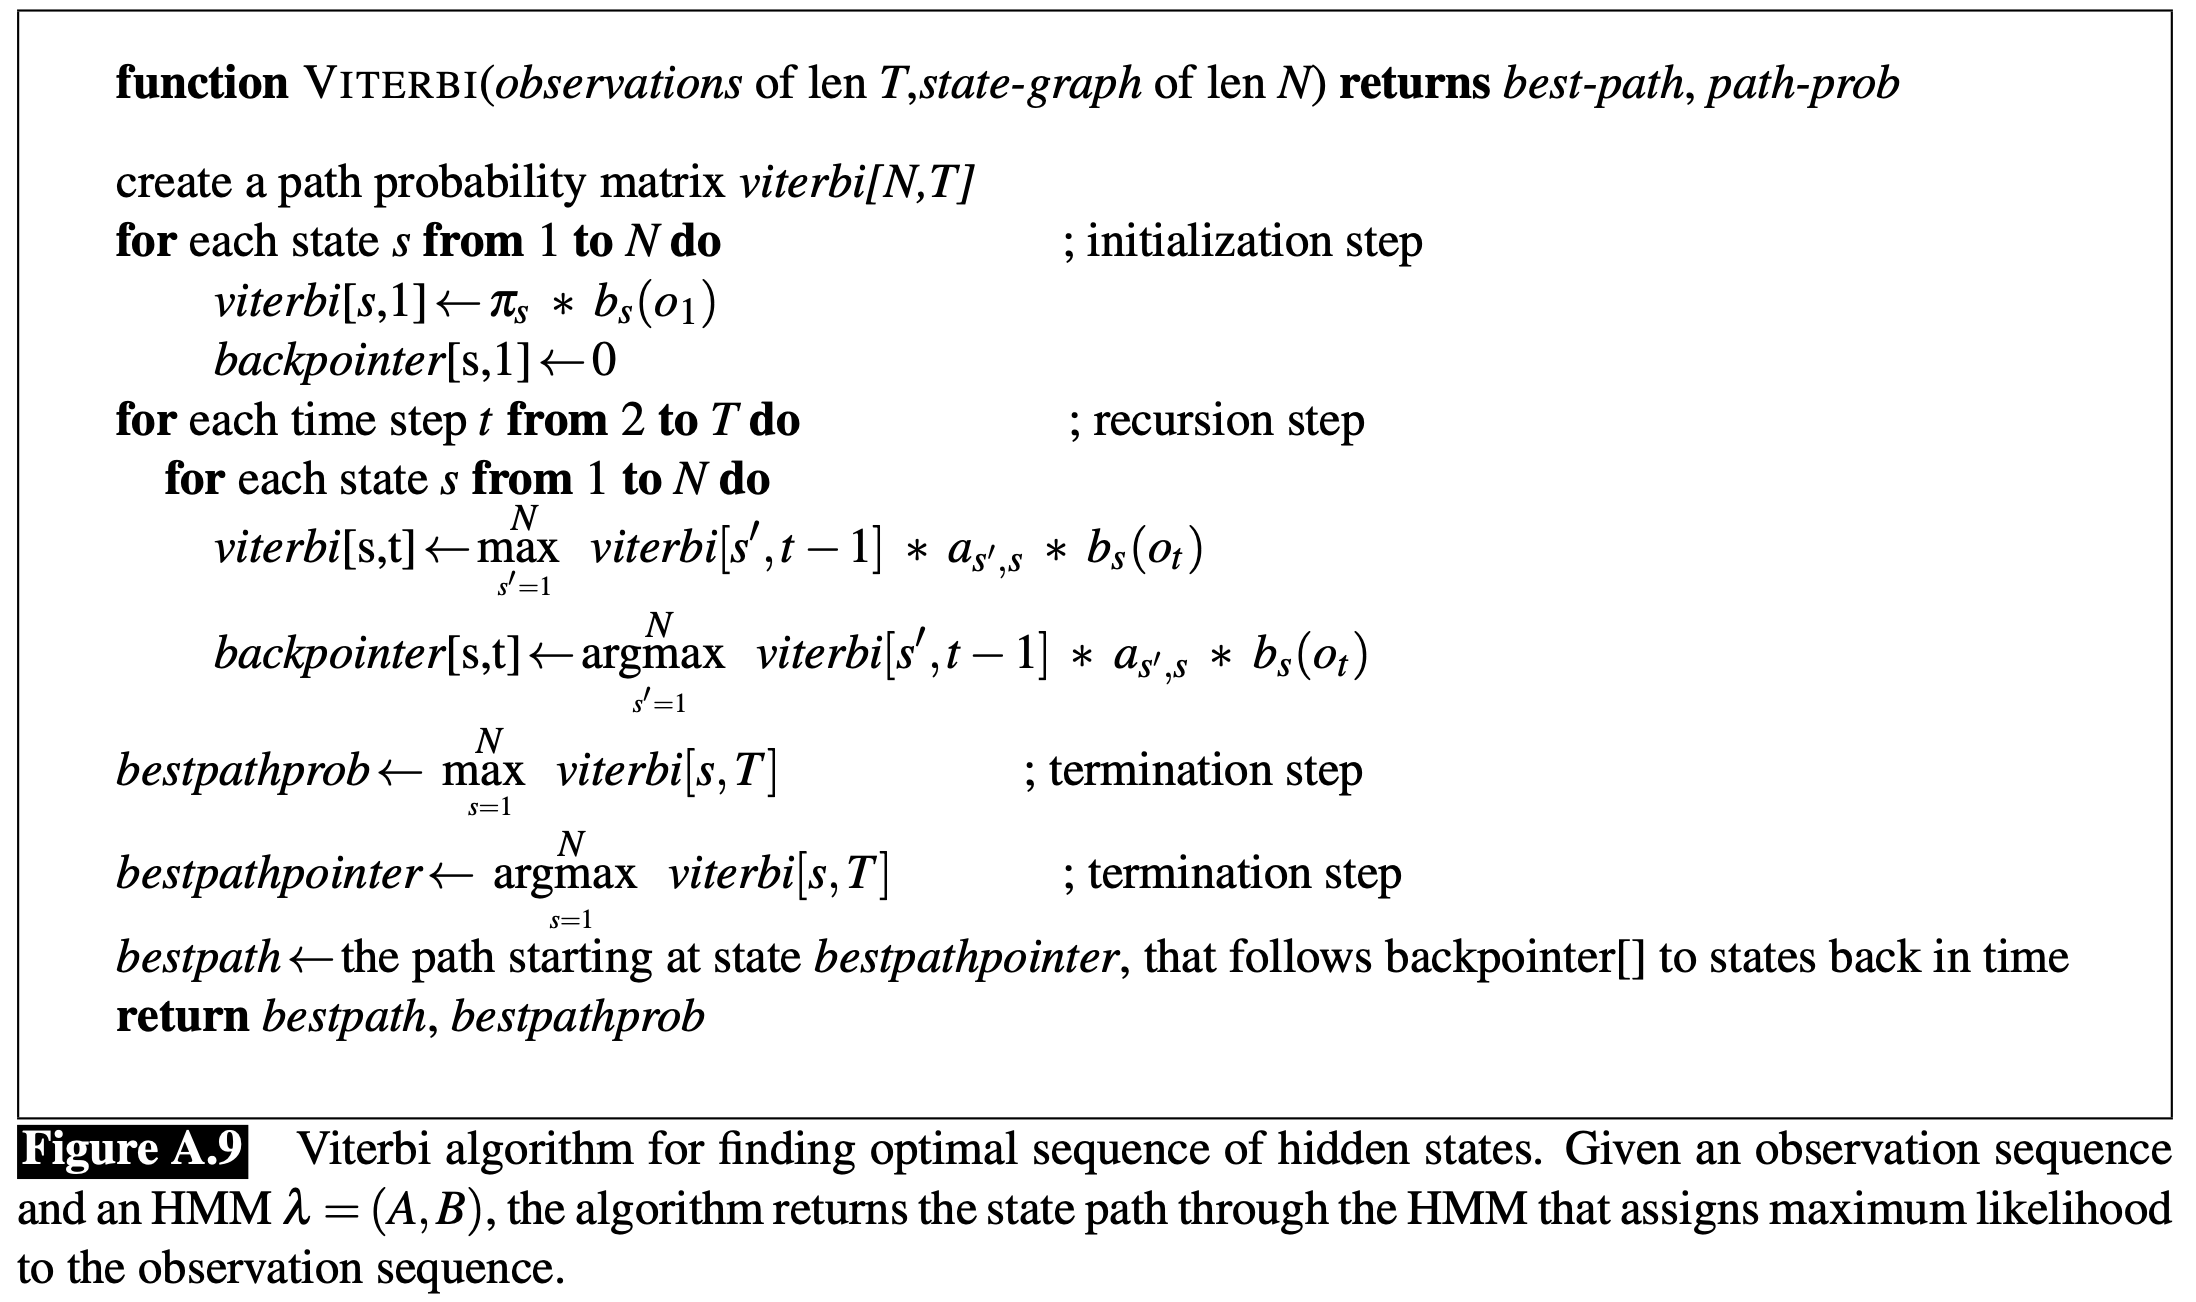

## Task 1: Testing the HMM (20 Points)

In [3]:
### DO NOT EDIT ###

# 5 points for the fit test case
# 15 points for the decode test case

# run the funtion that tests the HMM with synthetic parameters!
run_tests()

Testing the fit function of the HMM
All Test Cases Passed!
Testing the decode function of the HMM
All Test Cases Passed!
Yay! You have a working HMM. Now try creating a pos-tagger using this class.


## Task 2: PoS Tagging on Hindi Tagset (20 Points)

For this assignment, we will use the Hindi Tagged Dataset available with nltk.indian

Helper methods to load the dataset is provided in hmm.py

Please go through the functions and explore the dataset

Report the Accuracy for the Dev and Test Sets. You should get something between 65-85%

In [4]:
words, tags, observation_dict, state_dict, all_observation_ids, all_state_ids = get_hindi_dataset()

# we need to add the id for unknown word (<unk>) in our observations vocab
unk_token = '<unk>'

observation_dict[unk_token] = len(observation_dict)
print("id of the <unk> token:", observation_dict[unk_token])

id of the <unk> token: 2186


In [5]:
print("No. of unique words in the corpus:", len(observation_dict))
print("No. of tags in the corpus", len(state_dict))

No. of unique words in the corpus: 2187
No. of tags in the corpus 26


In [6]:
# Split the dataset into train, validation and development sets

import random
random.seed(42)
from sklearn.model_selection import train_test_split

data_indices = list(range(len(all_observation_ids)))

train_indices, dev_indices = train_test_split(data_indices, test_size=0.2, random_state=42)

dev_indices, test_indices = train_test_split(dev_indices, test_size=0.5, random_state=42)

print(len(train_indices), len(dev_indices), len(test_indices))


def get_state_obs(state_ids, obs_ids, indices):
    return [state_ids[i] for i in indices], [obs_ids[i] for i in indices]


train_state_ids, train_observation_ids = get_state_obs(all_state_ids, all_observation_ids, train_indices)
dev_state_ids, dev_observation_ids = get_state_obs(all_state_ids, all_observation_ids, dev_indices)
test_state_ids, test_observation_ids = get_state_obs(all_state_ids, all_observation_ids, test_indices)

432 54 54


In [7]:
def add_unk_id(observation_ids, unk_id, ratio=0.05):
    """
    make 1% of observations unknown
    """
    for obs in observation_ids:
        for i in range(len(obs)):
            if random.random() < ratio:
                obs[i] = unk_id

add_unk_id(train_observation_ids, observation_dict[UNK_TOKEN])
add_unk_id(dev_observation_ids, observation_dict[UNK_TOKEN])
add_unk_id(test_observation_ids, observation_dict[UNK_TOKEN])

In [8]:
pos_tagger = HMM(len(state_dict), len(observation_dict))
pos_tagger.fit(train_state_ids, train_observation_ids)

In [9]:
assert np.round(np.exp(pos_tagger.pi).sum()) == 1
assert np.round(np.exp(pos_tagger.A).sum()) == len(state_dict)
assert np.round(np.exp(pos_tagger.B).sum()) == len(state_dict)

print('All Test Cases Passed!')

All Test Cases Passed!


In [10]:
def accuracy(my_pos_tagger, observation_ids, true_labels):
    tag_predictions = my_pos_tagger.decode(observation_ids)
    tag_predictions = np.array([t for ts in tag_predictions for t in ts])
    true_labels_flat = np.array([t for ts in true_labels for t in ts])
    acc = np.sum(tag_predictions == true_labels_flat)/len(tag_predictions)
    return acc

In [11]:
print('dev accuracy:', accuracy(pos_tagger, dev_observation_ids, dev_state_ids))

dev accuracy: 0.8127659574468085


In [12]:
print('test accuracy:', accuracy(pos_tagger, test_observation_ids, test_state_ids))

test accuracy: 0.7987012987012987


In [13]:
# Fit a pos_tagger on the entire dataset.
import pickle

full_state_ids = train_state_ids + dev_state_ids + test_state_ids
full_observation_ids = train_observation_ids + dev_observation_ids + test_state_ids

hindi_pos_tagger = HMM(len(state_dict), len(observation_dict))
hindi_pos_tagger.fit(full_state_ids, full_observation_ids)

pickle.dump(hindi_pos_tagger, open('hindi_pos_tagger.pkl', 'wb'))

In [ ]:
### Finally we will use the hindi_pos_tagger as a pre-processing step for our NER tagger